# <font color='red' size='6'>Inteligência Artificial</font>
### Atividade: Previsão de óbito por COVID-19
<font color='red' size='4'><b>Problema de Negócio</b></font>: Com base nos dados obtidos de (1), o problema de negócio é: prever se uma pessoa pode vir a óbito ou não por COVID-19.

(1) COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Disponível em Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset . Data da consulta: 15 de março de 2025.

Fonte: YAVUZ, Ü. N. A. L.; DUDAK, Muhammed Nuri. Classification of Covid-19 Dataset with Some Machine Learning Methods. Journal of Amasya University the Institute of Sciences and Technology, v. 1, n. 1, p. 30-37. Disponível em: https://dergipark.org.tr/en/pub/jauist/issue/55760/748667. Data da Consulta: 15 de Marco de 2025.
 
<font color='red' size='4'><b>Etapas: Seleção de Atributos. Aprendizado: Aplicação dos Algoritmos, Avaliação, Geração de Modelos Preditivos, Otimização e Validação</b></font>

Descrição: 
<ol>
    <li>Dataset " df_covid_preparados.csv " contendo 95839 casos de COVID-19 que são formados por 19 atributos e registrados pelo governo mexicano entre 15 de janeiro de 2020 e 3 de maio de 2020 para dados sobre a doença de Covid-19.</li>
<li>Notebook “IA_EAD_Projeto_COVID19_SelecaoAprendizadoOtimizacao_Classificacao_v20242.ipynb” que deve ser executado com o dataset do grupo indicado no item 1 desta atividade. Não se esqueça de separar 10 dados, sendo 5 com óbito e 5 sem óbito para permitir os testes. Esses 10 dados devem ser gravados em um dataset que será utilizado para validação ao final do notebook.</li>
<li>Modelo preditivo obtido no item 2: o modelo preditivo gerado: “modelo_METODO_class_obitoCOVID_GRUPO.sav”, encontrado a partir da execução do Notebook do item 2. Não se esqueça de alterar a parte do arquivo com o nome do grupo, indicado por vocês e o nome do MÉTODO</li>
<li>A partir do modelo gerado, realizar os testes solicitados com os 10 dados separados e montar uma tabela HTML na qual consta os resultados.</li>   
<li>Após obter os resultados, discuta-os. Por exemplo, apresente os aspectos positivos e limitações do modelo, tendo por base o relatório de métricas/matriz de confusão do modelo otimizado e os resultados obtidos com os 10 dados de validação.</li>
</ol>

### <font color="black" size='3'><b>Grupo em ordem alfabética (máx. 4 alunos) </b></font>
<html>
<table border="1px">
<tr>
<td bgcolor="Aquamarine">Nome</td>
<td bgcolor="Aquamarine">RA</td>
</tr>
<tr>
<td bgcolor="white">Aline Yumi Higa</td>
<td bgcolor="white">10402138</td>
</tr>
<tr>
<td bgcolor="white">Gustavo Garabetti Munhoz</td>
<td bgcolor="white">10409258</td>
</tr>
<tr>
<td bgcolor="white">Karine Yoo Lim Choi</td>
<td bgcolor="white">10403237</td>
</tr>
    <tr>
<td bgcolor="white">Paula Aguiar Oliveira</td>
<td bgcolor="white">10403270</td>
</tr>
    </table>
</html>

In [10]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ignora os warnings 
import warnings
warnings.filterwarnings("ignore")
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline

# Análise Exploratória: Síntese

In [10]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Retrieved 
# from Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset
df_covid = pd.read_csv('df_covid_preparados.csv', sep = ',', encoding = 'UTF-8')

In [12]:
# Mostra dois registros do arquivo
df_covid.head(2)

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,0
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,0


In [14]:
# apresenta os tipas de dados das colunas
df_covid.dtypes

sexo               int64
tipo_paciente      int64
intubado           int64
pneumonia          int64
idade              int64
gravidez           int64
diabetes           int64
copd               int64
asma               int64
imunossupressao    int64
hipertensao        int64
outras_doencas     int64
cardiovascular     int64
obesidade          int64
irc                int64
fumante            int64
outro_caso         int64
teste_covid        int64
icu                int64
obito              int64
dtype: object

In [16]:
# Mostra o shape do dataset
df_covid.shape

(95839, 20)

In [18]:
## Mostra a frequência absoluta de  registros do atributo sexo (intervalo: [1,2]), onde:
# 1- Mulher, 2- homem  
df_covid.groupby("sexo").size()

sexo
1    47119
2    48720
dtype: int64

In [20]:
# Mostra a frequência absoluta de  registros do atributo tipo_paciente (intervalo: [1,2]), onde:
# Tipo 1, Tipo 2 
df_covid.groupby("tipo_paciente").size()

tipo_paciente
1    70268
2    25571
dtype: int64

In [22]:
# Mostra a frequência absoluta  de  registros do atributo intubado (intervalo: [1,99]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica, 99: Não disponível. 
df_covid.groupby("intubado").size()

intubado
1      1934
2     23613
97    70268
99       24
dtype: int64

In [24]:
# Mostra a frequência absoluta  de  registros do atributo pneumonia (intervalo: [1,99]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica, 99: Não disponível. 
df_covid.groupby("pneumonia").size()

pneumonia
1     17628
2     78203
99        8
dtype: int64

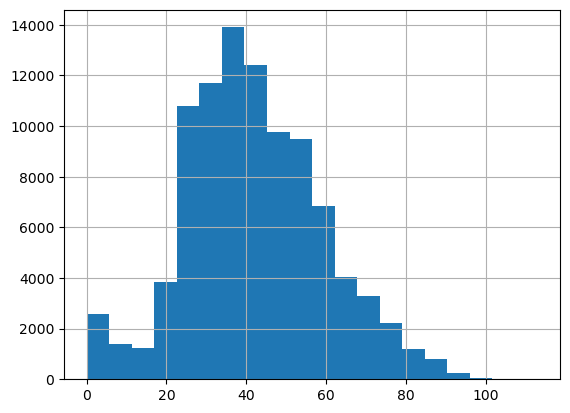

In [26]:
# Apresenta o histograma do atributo idade. Observe a distribuição e os picos.
# Considere bins como sendo o número de barras
df_covid.idade.hist(bins=20)
plt.show()

In [27]:
# Mostra a frequência absoluta de  registros do atributo gravidez (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("gravidez").size()

gravidez
1       978
2     45909
97    48720
98      232
dtype: int64

In [30]:
# Mostra a frequência absoluta de  registros do atributo diabetes (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("diabetes").size()

diabetes
1     12878
2     82544
98      417
dtype: int64

In [32]:
# Mostra a frequência absoluta de  registros do atributo copd (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("copd").size()

copd
1      2462
2     92973
98      404
dtype: int64

In [34]:
# Mostra a frequência absoluta de  registros do atributo asma (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("asma").size()

asma
1      4328
2     91102
98      409
dtype: int64

In [36]:
# Mostra a frequência absoluta de  registros do atributo imunossupressao (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("imunossupressao").size()

imunossupressao
1      2314
2     93099
98      426
dtype: int64

In [38]:
# Mostra oa frequência absoluta de  registros do atributo hipertensao (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("hipertensao").size()

hipertensao
1     16716
2     78721
98      402
dtype: int64

In [40]:
# Mostra a frequência absoluta de  registros do atributo outras_doencas (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("outras_doencas").size()

outras_doencas
1      4642
2     90639
98      558
dtype: int64

In [42]:
# Mostra a frequência absoluta de  registros do atributo cardiovascular (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("cardiovascular").size()

cardiovascular
1      2986
2     92437
98      416
dtype: int64

In [44]:
# Mostra a frequência absoluta de  registros do atributo obesidade (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("obesidade").size()

obesidade
1     15597
2     79852
98      390
dtype: int64

In [46]:
# Mostra a frequência absoluta de  registros do atributo irc (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
# irc = insuficiência renal crônica
df_covid.groupby("irc").size()

irc
1      2287
2     93146
98      406
dtype: int64

In [48]:
# Mostra a frequência absoluta de  registros do atributo fumante (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("fumante").size()

fumante
1      9311
2     86124
98      404
dtype: int64

In [50]:
# Mostra a frequência absoluta de  registros do atributo outro_caso (intervalo: [1,98]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica. 
df_covid.groupby("outro_caso").size()

outro_caso
1     29089
2     31255
99    35495
dtype: int64

In [52]:
# Mostra a frequência absoluta de  registros do atributo teste_covid (intervalo: [1,3]), onde: 
# 1 = COVID-19 Positivo, 2 = COVID-19 Negativo, 3 = Não se aplica. 
df_covid.groupby("teste_covid").size()

teste_covid
1    23471
2    59704
3    12664
dtype: int64

In [54]:
# Mostra a frequência absoluta de  registros do atributo icu (intervalo: [1,99]), onde: 
# 1 = Sim, 2 = Não, 98/97: Não se aplica, 99 - Não disponivel. 
# uci = unidade de terapia intensiva
df_covid.groupby("icu").size()

icu
1      2180
2     23366
97    70268
99       25
dtype: int64

In [56]:
# Mostra a frequência absoluta de  registros do atributo obito (intervalo: [0,1]), onde: 
# 1 = Sim, 2 = Não.
df_covid.groupby("obito").size()

obito
0    92404
1     3435
dtype: int64

In [58]:
# Resumo estatístico do dataset completo
df_covid.describe()

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
count,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000,95839.000000
mean,1.508353,1.266812,71.656966,1.824163,42.052734,50.515677,2.283329,2.378990,2.364528,2.402571,2.228258,2.510502,2.385542,2.227913,2.382819,2.307526,37.621469,1.887238,71.655412,0.035841
std,0.499933,0.442296,42.039542,0.968724,17.318496,47.502147,6.336700,6.223473,6.264395,6.389617,6.227323,7.310702,6.315538,6.133032,6.238525,6.233148,47.076124,0.603595,42.043316,0.185895
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,2.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,0.000000
75%,2.000000,2.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000,0.000000
max,2.000000,2.000000,99.000000,99.000000,113.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,1.000000


In [60]:
# Resumo estatístico dos que faleceram
df_covid[df_covid.obito == 1].describe()

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
count,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.0
mean,1.645706,1.913828,9.968268,1.276565,58.684716,63.563610,2.493741,2.773508,2.838137,2.976419,2.381659,3.091412,2.889083,2.378748,2.690539,2.873362,54.148763,1.428530,10.023290,1.0
std,0.478368,0.280658,26.732620,0.447364,17.266434,45.381534,9.275606,9.093441,9.084153,9.919817,8.838100,10.564488,9.655552,7.864280,8.646390,9.657801,48.463608,0.596828,26.715122,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,1.000000,2.000000,2.000000,1.000000,49.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.0
50%,2.000000,2.000000,2.000000,1.000000,60.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,1.000000,2.000000,1.0
75%,2.000000,2.000000,2.000000,2.000000,70.500000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,2.000000,1.0
max,2.000000,2.000000,97.000000,2.000000,100.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,97.000000,1.0


In [62]:
# Resumo estatístico dos que sobrevireram
df_covid[df_covid.obito == 0].describe()

,sexo,tipo_paciente,intubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunossupressao,hipertensao,outras_doencas,cardiovascular,obesidade,irc,fumante,outro_caso,teste_covid,icu,obito
count,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.000000,92404.0
mean,1.503247,1.242760,73.950164,1.844520,41.434462,50.030637,2.275508,2.364324,2.346922,2.381239,2.222555,2.488907,2.366824,2.222306,2.371380,2.286492,37.007088,1.904290,73.946507,0.0
std,0.499992,0.428754,40.739893,0.976889,17.009850,47.510361,6.200591,6.090350,6.134006,6.218943,6.108792,7.160478,6.155830,6.059129,6.130579,6.067763,46.911912,0.597093,40.747660,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,1.000000,1.000000,97.000000,2.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,97.000000,0.0
50%,2.000000,1.000000,97.000000,2.000000,40.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,0.0
75%,2.000000,1.000000,97.000000,2.000000,52.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000,0.0
max,2.000000,2.000000,99.000000,99.000000,113.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,0.0


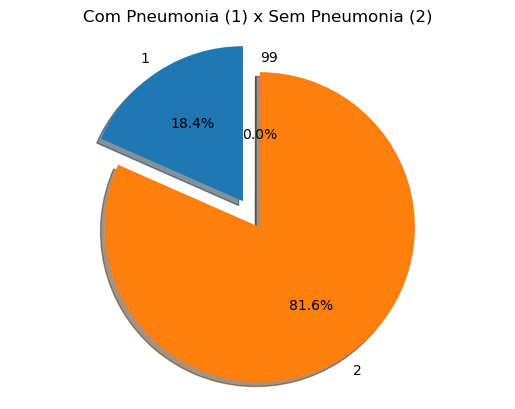

In [64]:
# Obtém a frequência absoluta de pessoas com pneumonia
serie_pneumonia = df_covid.groupby("pneumonia").size()

# coloca "explode" com 0 em todos os índices, exceção o índece 0 com o valor 0.2
explode = tuple(0 if i != 0 else 0.2 for i in range(serie_pneumonia.size))

plt.pie(serie_pneumonia.values, explode=explode, labels=serie_pneumonia.index, 
        autopct='%1.1f%%', shadow=True, startangle=90)
# equal garante que o gráfico seja desenhado como um círculo. 
plt.axis('equal')
plt.title("Com Pneumonia (1) x Sem Pneumonia (2)")

plt.show()

A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

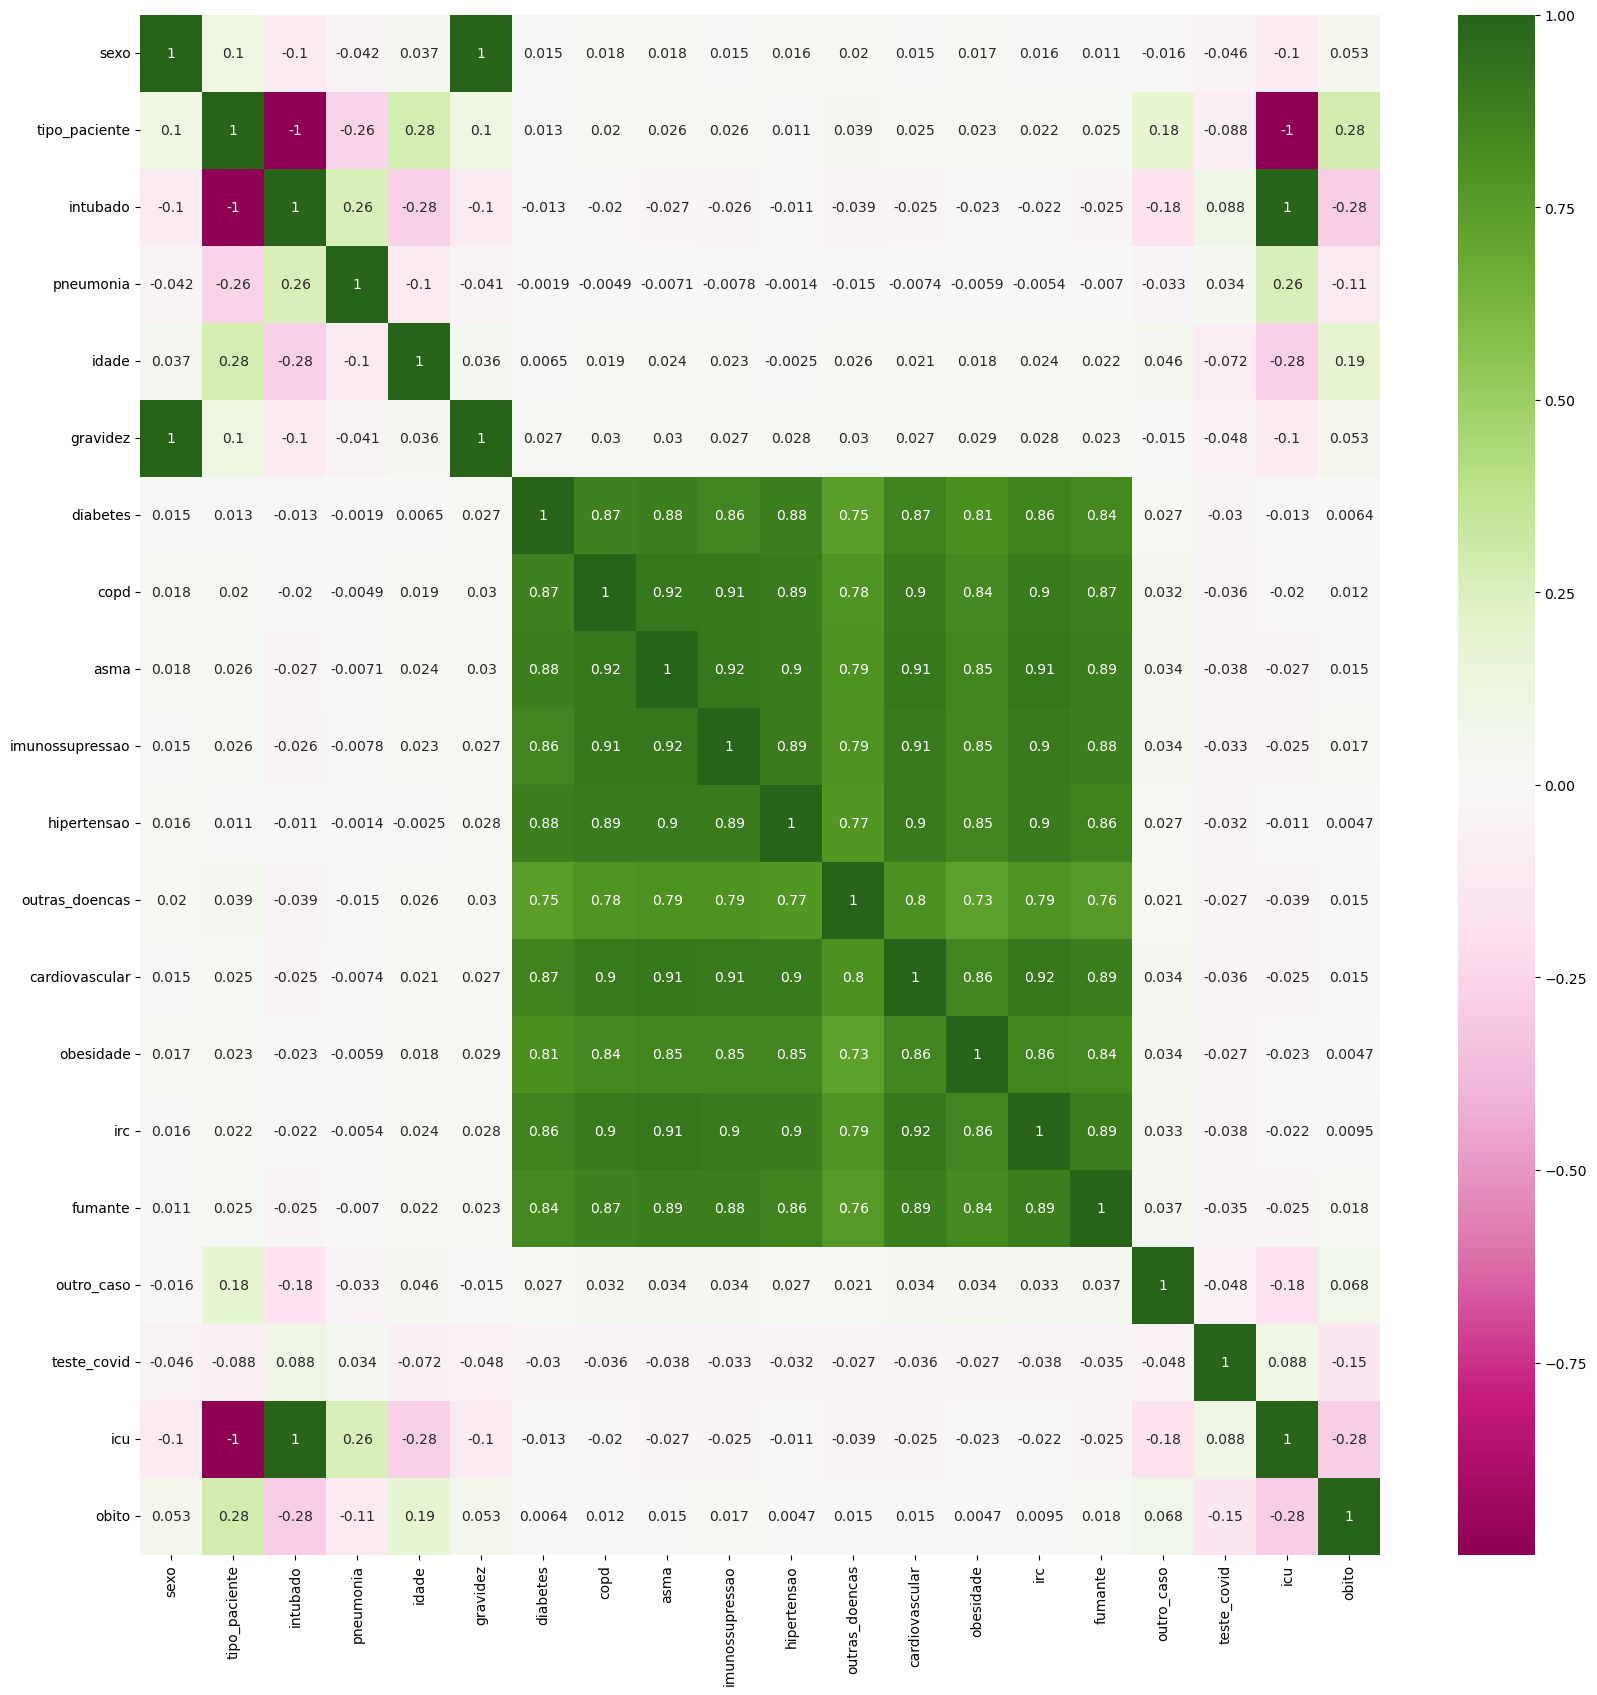

In [67]:
# Cria mapa de calor com a correlação do dataset com o mapa ce cores PiYG
# Aumenta o tamanho da figura a ser exibida
plt.figure(figsize=(20,20))
sns.heatmap(df_covid.corr(), annot=True, cmap = "PiYG")
plt.show()

## Método Ensemble para Seleção de Variáveis

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
        
Bagged Decision Trees, como o algoritmo RandomForest (são chamados de Métodos Ensemble), podem ser usados para estimar a importância de cada atributo. 

Esse método retorna um score para cada atributo.

Quanto maior o score, maior a importância do atributo.

### Importância do Atributo com o RandomForestClassifier

In [71]:
# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Retrieved 
# from Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset
df_covid = pd.read_csv('df_covid_preparados.csv', sep = ',', encoding = 'UTF-8')

In [75]:
# Mostra as colunas do dataset
df_covid.columns

Index(['sexo', 'tipo_paciente', 'intubado', 'pneumonia', 'idade', 'gravidez',
       'diabetes', 'copd', 'asma', 'imunossupressao', 'hipertensao',
       'outras_doencas', 'cardiovascular', 'obesidade', 'irc', 'fumante',
       'outro_caso', 'teste_covid', 'icu', 'obito'],
      dtype='object')

In [77]:
qtdeColunas = len(df_covid.columns)

In [79]:
# Carregando os dados
array = df_covid.values

In [81]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:qtdeColunas-1] # Atributos Preditores selecionados de 1 a 5 (exclusivo)
Y = array[:,qtdeColunas-1] # Atributo alvo: severity (1 - maligno, 0 - benigno

In [83]:
X

array([[ 2,  1, 97, ..., 99,  1, 97],
       [ 1,  1, 97, ..., 99,  1, 97],
       [ 2,  2,  2, ..., 99,  1,  2],
       ...,
       [ 1,  2,  2, ..., 99,  3,  2],
       [ 1,  1, 97, ...,  1,  3, 97],
       [ 2,  1, 97, ...,  1,  3, 97]])

In [85]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
# Criação do Modelo - Feature Selection
modelo = RandomForestClassifier()
modelo.fit(X, Y)

RandomForestClassifier()

In [88]:
# Monta uma série contendo os nomes dos atributos e a sua importância 
sAtributos = pd.Series(modelo.feature_importances_, index=df_covid.columns[0:qtdeColunas-1])

In [89]:
# Mostra a importância dos atributos
# Considerando este fato, podemos selecionar os mais relevantes
# Claro que podemos utilizar o nosso conhecimento sobre o assunto
sAtributos.sort_values(ascending=False)[0:qtdeColunas-1]

idade              0.440124
intubado           0.073400
teste_covid        0.061374
outro_caso         0.053463
icu                0.047860
pneumonia          0.041111
obesidade          0.033129
diabetes           0.030275
hipertensao        0.029692
fumante            0.026182
cardiovascular     0.022259
outras_doencas     0.022128
tipo_paciente      0.020619
copd               0.019904
irc                0.018692
imunossupressao    0.017185
gravidez           0.016599
sexo               0.014685
asma               0.011319
dtype: float64

In [90]:
# IMPORTANTE:
# FAÇA AQUI A SELEÇÃO DE ATRIBUTOS E GRAVE O DATASET 
# Montando o dataset com os atributos preditores selecionados
# e o atributo alvo MODIFIQUE O ELABORADO ABAIXO.
dfcovid_SPAtribSelec = df_covid[["idade", "intubado", "teste_covid", "outro_caso", "icu", "pneumonia", "obesidade", "hipertensao", "diabetes", "fumante", "outras_doencas", "cardiovascular", "obito"]];
dfcovid_SPAtribSelec.head(3)

,idade,intubado,teste_covid,outro_caso,icu,pneumonia,obesidade,hipertensao,diabetes,fumante,outras_doencas,cardiovascular,obito
0,42,97,1,99,97,2,2,2,2,2,2,2,0
1,51,97,1,99,97,2,2,2,2,2,2,2,0
2,51,2,1,99,2,2,1,1,1,2,2,2,0


In [91]:
# Salvando os atributos preparados
dfcovid_SPAtribSelec.to_csv("dfcovid_atrib_selec.csv", index=False)

# Dataset de validação
<p>A partir do dataset com os atributos selecionados anteriormente "dfcovid_atrib_selec.csv", separe 10 dados do dataset, sendo 5 COM ÓBITO e 5 SEM ÓBITO. Esses dados serão utilizadso na validação final.<br>
<p>CUIDADO! A seleção deve ser aleatória e pode ser feita diretamente (manualmente) no arquivo do CSV. O nome do arquivo de dados de validação pode ser "dfcovid_atrib_selec_valida.csv".<br>
<p>Lembrando que esses dados serão utilizados na etapa de validação ao final deste notebook.

In [93]:
# Import dos Módulos
from pandas import read_csv
import random

In [94]:
# leia o dataset de validação 

In [95]:
df_orig = pd.read_csv('dfcovid_atrib_selec.csv', sep = ',', encoding = 'UTF-8')
df_valid_obito = df_orig[df_orig.obito == 1].sample(n=5, random_state=random.randint(0, 12345))
df_valid_n_obito = df_orig[df_orig.obito == 0].sample(n=5, random_state=random.randint(0, 12345))

df_valid = pd.concat([df_valid_obito, df_valid_n_obito], ignore_index=False)
df_valid = df_valid.sample(frac=1, random_state=9)

df_valid.to_csv("dfcovid_atrib_selec_valida.csv")

In [104]:
df_validacao = pd.read_csv('dfcovid_atrib_selec_valida.csv', sep = ',', encoding = 'UTF-8', index_col=0)

In [106]:
# Apresente o seu conteúdo com df_validacao.head(10)

In [108]:
df_validacao.head(10)

,idade,intubado,teste_covid,outro_caso,icu,pneumonia,obesidade,hipertensao,diabetes,fumante,outras_doencas,cardiovascular,obito
12253,71,97,1,1,97,2,2,1,1,2,2,2,0
71128,61,2,1,2,2,1,2,2,1,2,2,2,1
29016,29,97,2,99,97,2,2,2,2,2,1,2,0
28456,81,2,2,99,2,2,2,2,2,2,2,2,1
10374,57,1,1,1,2,1,2,1,2,2,2,2,1
10924,55,97,2,2,97,2,2,2,2,2,2,2,0
51858,63,2,2,2,2,1,1,1,1,2,2,2,1
69751,48,1,1,2,2,1,2,1,2,2,2,2,1
84328,41,97,2,1,97,2,2,2,2,2,2,2,0
87181,50,97,2,1,97,2,2,2,2,2,2,2,0


# Aprendizado Supervisionado: Algoritmos de Classificação

Não há como saber qual algoritmo vai funcionar melhor na construção do modelo, antes de realizar os testes do algoritmo com os dados de testes do </i>dataset</i>. 

O ideal é testar alguns algoritmos e então escolher aquele que fornece melhor nível de precisão. 

Para isso, serão considerados os algoritmos de classificação:

1) <i>K-Nearest Neighbors</i> (KNN)<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

2) Árvore de Decisão (CART - <i>Classification and Regression Trees</i>) <br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.

3) Regressão Logística <br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

4) Naïve Bayes<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.

5) Máquinas de Vetores de Suporte (SVMs - <i>Support Vector Machines</i>)<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

6) Random Forest<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

7) AdaBoost<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html.

Todos os sete algoritmos serão utilizados juntos com os mesmos dados de treino e teste.

A métrica de comparação utilizada será acurácia.

### Dados de Treino e de Teste

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. 

Dividimos nossos dados originais em dados de treino e de teste. 

Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. 

A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 80/20 (treino/teste) e 70/30 (treino/teste).

Este método é bem veloz e ideal para conjuntos de dados muito grandes. 

O ponto negativo é a possibilidade de alta variância.

## Avaliando a Performance


As métricas que você escolhe para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.

Vamos utilizar o mesmo algoritmo, mas com métricas diferentes e assim comparar os resultados. 

### Métricas para Algoritmos de Classificação

Documentação: https://scikit-learn.org/stable/modules/model_evaluation.html.

In [114]:
# Import dos módulos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importando os módulos dos algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [116]:
df_covid = pd.read_csv('dfcovid_atrib_selec.csv', sep = ',', encoding = 'UTF-8')
print(df_covid.shape)

df_validacao = pd.read_csv('dfcovid_atrib_selec_valida.csv', sep = ',', encoding = 'UTF-8', index_col=0)
print(df_validacao.shape)

df_covid = df_covid.drop(df_validacao.index.to_list()).reset_index(drop=True)
print(df_covid.shape)

df_covid.to_csv('dfcovid_atrib_selec<SEM DADOS DE VALIDAÇÃO>.csv', sep = ',', encoding = 'UTF-8')

(95839, 13)
(10, 13)
(95829, 13)


In [118]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Retrieved 
# from Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset

df_covid = pd.read_csv('dfcovid_atrib_selec<SEM DADOS DE VALIDAÇÃO>.csv', sep = ',', encoding = 'UTF-8')

In [120]:
# Obtém os dados do câncer de mama
array = df_covid.values

In [122]:
df_covid.shape

(95829, 14)

In [124]:
qtdeColunas = len(df_covid.columns)

In [126]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:qtdeColunas-1] # Atributos Preditores selecionados de 0 a qtdeColunas (exclusivo)
Y = array[:,qtdeColunas-1] # Atributo alvo: obito (1 - sim, 0 - não)

In [128]:
X

array([[    0,    42,    97, ...,     2,     2,     2],
       [    1,    51,    97, ...,     2,     2,     2],
       [    2,    51,     2, ...,     2,     2,     2],
       ...,
       [95826,    65,     2, ...,     2,     2,     2],
       [95827,    48,    97, ...,     2,     2,     2],
       [95828,    23,    97, ...,     2,     2,     2]])

In [130]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
# Definindo o tamanho das amostras
teste_size = 0.3

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [134]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [136]:
# Preparando a lista de modelos instanciados
modelos = []
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('LR', LogisticRegression()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))
modelos.append(('RFor', RandomForestClassifier()))
modelos.append(('AdaB', AdaBoostClassifier()))

In [138]:
# Avaliando cada modelo em um loop
dicAcuracia = {}
dicMatriz = {}
dicRelatorio = {}

for nome, modelo in modelos:
    # Treinamento do modelo
    modelo.fit(X_treino, Y_treino)
    # Fazendo as previsões e construindo a Matriz de Confusão
    previsoes = modelo.predict(X_teste)
    # Obtendo a matriz de confusão
    matrix = confusion_matrix(Y_teste, previsoes)
    # construindo o relatório de resultados
    report = classification_report(Y_teste, previsoes)
    # Score do modelo nos dados de teste  (Acurácia)
    acuracia = modelo.score(X_teste, Y_teste)
    # Criando dicionários para a acurácia matriz de confusão e relatório
    dicAcuracia[nome] = acuracia*100.0
    dicMatriz[nome] = matrix
    dicRelatorio[nome] = report

In [139]:
# Montando um dataframe com a acurácia obtida de cada modelo
pdAcuraciaModelos = pd.DataFrame(dicAcuracia.items())
pdAcuraciaModelos.columns = ['nome','acuracia']

In [142]:
# Apresenta a acurácia dos modelos ordenados
pdAcuraciaModelos.sort_values(ascending=False, by='acuracia')

,nome,acuracia
6,AdaB,96.427702
4,SVM,96.410310
2,LR,96.410310
5,RFor,96.274653
0,KNN,96.010296
1,CART,94.545897
3,NB,94.535462


In [144]:
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('LR', LogisticRegression()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))
modelos.append(('RFor', RandomForestClassifier()))
modelos.append(('AdaB', AdaBoostClassifier()))

In [146]:
# Apresenta a matriz de confusão para o KNN
dicMatriz['KNN']

array([[27537,   180],
       [  967,    65]])

In [148]:
# Apresenta a matriz de confusão para o CART
dicMatriz['CART']

array([[26898,   819],
       [  749,   283]])

In [150]:
# Apresenta a matriz de confusão para o Regressão Logística
dicMatriz['LR']

array([[27700,    17],
       [ 1015,    17]])

In [152]:
# Apresenta a matriz de confusão para o Naive Bayes
dicMatriz['NB']

array([[26901,   816],
       [  755,   277]])

In [154]:
# Apresenta a matriz de confusão para o SVM
dicMatriz['SVM']

array([[27717,     0],
       [ 1032,     0]])

In [156]:
# Apresenta a matriz de confusão para o Random Forest
dicMatriz['RFor']

array([[27485,   232],
       [  839,   193]])

In [158]:
# Apresenta a matriz de confusão para o Random Forest
dicMatriz['AdaB']

array([[27555,   162],
       [  865,   167]])

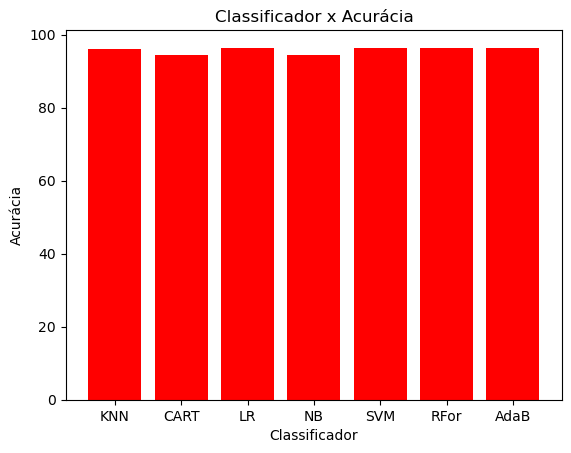

In [160]:
# Gráfico de barras para comparar a acurácia entre os modelos
plt.bar(list(dicAcuracia.keys()), dicAcuracia.values(), color='red')
# legenda do eixo x
plt.xticks(list(dicAcuracia.keys()))
# Label eixo Y
plt.ylabel('Acurácia')
# Label eixo X
plt.xlabel('Classificador')
# Título do gráfico
plt.title('Classificador x Acurácia')
# mostra o gráfico
plt.show()

# Otimização do Modelo - Ajuste de Hyperparâmetros
<font color='red' size='4'><b>Escolha um algoritmo para realizar o ajuste de parâmetros</b></font>

Todos os algoritmos de Aprendizado de Máquina são parametrizados, o que significa que você pode ajustar a performance do seu modelo preditivo, através do <i>tuning</i> (ajuste fino) dos parâmetros. 

Seu trabalho é encontrar a melhor combinação entre os parâmetros em cada algoritmo de Aprendizado de Máquina. 

Esse processo também é chamado de Otimização Hyperparâmetro. 

O scikit-learn oferece dois métodos para otimização automática dos parâmetros: <i>Grid Search Parameter Tuning</i> e <i>Random Search Parameter Tuning</i>. 

# Random Search Parameter Tuning

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html.

Este método gera amostras dos parâmetros dos algoritmos a partir de uma distribuição randômica uniforme para um número fixo de interações. 

Um modelo é construído e testado para cada combinação de parâmetros.

Vamos experimentar este método utilizando algum algoritmo do seu interesse ou aquele que obteve melhor acurácia. 

Será necessário identificar os parâmetros do algoritmo, fornecer variações nos parâmetros e obter os melhores resultados 

In [164]:
# Import dos módulos
import numpy as np

# Uma variável aleatória contínua uniforme.
# No formulário padrão, a distribuição é uniforme em [0, 1]. 
# Usando os parâmetros loc e scale, obtém-se a distribuição uniforme em [loc, loc + scale].
from scipy.stats import uniform

from sklearn.model_selection import RandomizedSearchCV
# Importando o módulo do algoritmo selecionado
from sklearn.ensemble import AdaBoostClassifier

In [166]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Retrieved 
# from Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset
df_covid = pd.read_csv('dfcovid_atrib_selec.csv', sep = ',', encoding = 'UTF-8')

In [168]:
# Obtém os dados
array = df_covid.values

In [170]:
qtdeColunas = len(df_covid.columns)

In [172]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:qtdeColunas-1] # Atributos Preditores selecionados de 0 a qtdeColunas (exclusivo)
Y = array[:,qtdeColunas-1] # Atributo alvo: obito (1 - sim, 0 - não)

In [174]:
X

array([[42, 97,  1, ...,  2,  2,  2],
       [51, 97,  1, ...,  2,  2,  2],
       [51,  2,  1, ...,  2,  2,  2],
       ...,
       [65,  2,  3, ...,  2,  2,  2],
       [48, 97,  3, ...,  2,  2,  2],
       [23, 97,  3, ...,  2,  2,  2]])

In [176]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [200]:
# Definindo os valores que serão testados
# n_estimators (int), default = 50
#      O número máximo de estimadores em que o reforço é encerrado. 
#      Em caso de ajuste perfeito, o processo de aprendizagem é interrompido precocemente.
# learning_rate (float), default = 1.
#      A taxa de aprendizagem reduz a contribuição de cada classificador por learning_rate. 
#      Há uma compensação entre learning_rate e n_estimators.
# algorithm {‘SAMME’, ‘SAMME.R’}, padrão = ’SAMME.R’ (NÃO VAMOS UTILIZAR)
#      Se 'SAMME.R', então use o algoritmo real de boosting SAMME.R. 
#      base_estimator deve oferecer suporte ao cálculo de probabilidades de classe. 
#      Se 'SAMME', então use o algoritmo de aumento discreto SAMME. 
#      O algoritmo SAMME.R normalmente converge mais rápido do que SAMME, 
#      alcançando um erro de teste menor com menos iterações de reforço.
# random_state (int) ou RandomState, default = None
#      Controla a semente aleatória fornecida em cada base_estimator em cada iteração de reforço. 
#      Portanto, ele só é usado quando base_estimator expõe um random_state. 
#      Passe um int para saída reproduzível em várias chamadas de função. 
valores_grid = { "n_estimators": range(50, 70), "learning_rate": [x/10 for x in range(1, 11)] }
seed = 7

In [202]:
# Instanciando o modelo que será utilizado SEGUNDO OS RESULTADOS OBTIDOS ANTERIORMENTE
modelo = AdaBoostClassifier()

In [204]:
# Instancia o método para procura dos melhores hiperparâmetros
# com A QUANTIDADE DE ITERAÇÕES definidas por você (>= 200)
iterations = 400
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)

In [206]:
# Faz o fit para encontrar os melhores valores para os parâmetros
rsearch.fit(X, Y)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=400,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0],
                                        'n_estimators': range(50, 70)},
                   random_state=7)

In [208]:
# Print do resultado
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Melhores Parâmetros do Modelo:
 AdaBoostClassifier(learning_rate=0.3, n_estimators=52)


In [210]:
# Definindo o tamanho das amostras
teste_size = 0.2

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [212]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [218]:
# Criando o objeto que vai obter o modelo COM OS MELHORES HIPERPARÂMETROS SELECIONADOS 
modelo = AdaBoostClassifier(n_estimators=52, learning_rate=0.3)

In [220]:
# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Matriz de Confusão
previsoes = modelo.predict(X_teste)

In [222]:
# Obtendo a matriz de confusão
matrix = confusion_matrix(Y_teste, previsoes)

# construindo o relatório de resultados
report = classification_report(Y_teste, previsoes)

# Score do modelo nos dados de teste  (Acurácia)
result = modelo.score(X_teste, Y_teste)

In [224]:
# Imprime os resultados
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

# Imprimindo a Matriz de Confusão
print(matrix)

# Imprimindo o relatório
print(report)
array([[27555,   162],
       [  865,   167]])

Acurácia nos Dados de Teste: 96.489%
[[18450    25]
 [  648    45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18475
           1       0.64      0.06      0.12       693

    accuracy                           0.96     19168
   macro avg       0.80      0.53      0.55     19168
weighted avg       0.95      0.96      0.95     19168



<P><B>Questão a ser respondida</B></P>
<p> Reflita sobre os resultados obtidos com o relatório de medidas de performance do modelo e sua matriz de confusão e discuta-os (Sugestão: considere as métricas, matriz de confusão e cada classe individualmente) </P>
<P> Resposta: Após a realização do tuning de hiperparâmetros, obtemos as condições em que o modelo atinge a sua acurácia máxima - 52 estimadores e learning rate de 30% - e observamos um aumento de 0,0006% dessa métrica de desempenho. Porém, avaliar o modelo somente pela acurácia pode ser enganoso, visto que nossos dados de treinamento estão desbalanceados no target, concentrando 96,41% dos dados como negativos em óbito. Por conta disso, temos um claro aumento na precisão para não-óbito, o que indica que o modelo infere melhor os dados de esmagadora maioria no target. Porém, em relação aos dados de óbito, tivemos uma redução de 10% na revocação, fazendo com que o modelo prevê erroneamente casos de óbito, rotulando-os como não-óbito, o que pode ser prejudicial no uso real desse modelo. Para contornar esse problema, podemos realizar um tuning de hiperparâmetros visando outra métrica, como f1-score ou recall, em vez de priorizar a acurácia. </P>

# Salvando o modelo

O modelo deve ser obtido pelo algoritmo utilizado na etapa anterior, otimização do modelo, com os melhores valores para os seus hiperparâmetros.

In [5]:
# Import dos módulos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importando o módulo do algoritmo selecionado
from sklearn.ensemble import AdaBoostClassifier

# Importando o pacote utilizado para salvar o modelo como arquivo binário
import joblib

In [12]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# COVID-19 Mexico Patient Health Dataset. (2020, 05 19). Retrieved 
# from Kaggle.com: https://www.kaggle.com/riteshahlawat/covid19-mexico-patient-health-dataset
df_covid = pd.read_csv('dfcovid_atrib_selec.csv', sep = ',', encoding = 'UTF-8')

In [14]:
# Carregando os dados
array = df_covid.values

In [16]:
qtdeColunas = len(df_covid.columns)

In [18]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:qtdeColunas-1] # Atributos Preditores selecionados de 0 a qtdeColunas (exclusivo)
Y = array[:,qtdeColunas-1] # Atributo alvo: obito (1 - sim, 0 - não)

In [20]:
# Definindo o tamanho das amostras
teste_size = 0.2

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [22]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [24]:
# Criando o objeto que vai obter o modelo 
#  Fazendo uso dos melhores valores dos parâmetros obtidos com o RandomizeSearchCV
modelo = AdaBoostClassifier(n_estimators=52, learning_rate=0.3)

In [26]:
# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

AdaBoostClassifier(learning_rate=0.3, n_estimators=52)

In [28]:
# Salvar O NOME DO ARQUIVO do modelo, compatível com o algoritmo escolhido.
arquivo = 'modelo_METODO_class_obitoCOVID_GRUPO.sav'
joblib.dump(modelo, arquivo)
print("Modelo salvo!")

Modelo salvo!


In [30]:
# Carregando o arquivo
modelo_class_final = joblib.load(arquivo)
print("Modelo carregado!")

Modelo carregado!


In [32]:
# Fazendo previsões
Y_pred = modelo_class_final.predict(X_teste)

In [34]:
# Obtendo a matriz de confusão
matrix = confusion_matrix(Y_teste, Y_pred); matrix

array([[18450,    25],
       [  648,    45]])

In [36]:
# Score do modelo nos dados de teste  (Acurácia)
result = modelo_class_final.score(X_teste, Y_teste)

In [38]:
# Imprime os resultados
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 96.489%


# Realizando a validação

A partir do modelo otimizado, faça a validação com os 10 dados de validação separados. Depois, monte um quadro com os resultados e discuta-os neste notebook

In [86]:
import joblib
import pandas as pd

modelo = joblib.load('modelo_METODO_class_obitoCOVID_GRUPO.sav')
validation_dataset = pd.read_csv('dfcovid_atrib_selec_valida.csv', sep=',', index_col=0)

X_valid = validation_dataset.values[:,0:-1]
Y_valid = validation_dataset.values[:,-1]

Y_pred = modelo.predict(X_valid)

cnf_mtx = confusion_matrix(Y_valid, Y_pred)

print("Matriz de Confusão: \n", cnf_mtx)
print("\nRelatório de Classificação: \n", classification_report(Y_valid, Y_pred))
print("Acurácia: ", modelo.score(X_valid, Y_valid)*100)

Matriz de Confusão: 
 [[5 0]
 [5 0]]

Relatório de Classificação: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10

Acurácia:  50.0


### Monte um quadro com os resultados obtidos para os 10 dados de validação

In [ ]:
# Coloque o quadro aqui

In [136]:
import numpy as np

columns = pd.Index(validation_dataset.columns.tolist() + ['obito-pred'])

Y_pred = Y_pred.reshape(-1, 1)

new_ds = np.hstack((validation_dataset.values[:, :], Y_pred))
new_ds = pd.DataFrame(new_ds, columns=columns)

new_ds

,idade,intubado,teste_covid,outro_caso,icu,pneumonia,obesidade,hipertensao,diabetes,fumante,outras_doencas,cardiovascular,obito,obito-pred
0,71,97,1,1,97,2,2,1,1,2,2,2,0,0
1,61,2,1,2,2,1,2,2,1,2,2,2,1,0
2,29,97,2,99,97,2,2,2,2,2,1,2,0,0
3,81,2,2,99,2,2,2,2,2,2,2,2,1,0
4,57,1,1,1,2,1,2,1,2,2,2,2,1,0
5,55,97,2,2,97,2,2,2,2,2,2,2,0,0
6,63,2,2,2,2,1,1,1,1,2,2,2,1,0
7,48,1,1,2,2,1,2,1,2,2,2,2,1,0
8,41,97,2,1,97,2,2,2,2,2,2,2,0,0
9,50,97,2,1,97,2,2,2,2,2,2,2,0,0


### Discuta os resultados obtidos com a validação (compare com as métricas e matriz de confusão, indique limitações e vantagens.

In [ ]:
# Discuta abaixo os reultados da validação

Como esperado, o modelo acertou todos os casos de não-óbito. Porém, como os dados de treinamento de óbito estavam em baixa proporção, o modelo não conseguiu aprender bem como predizer os dados de óbito, obtendo baixa revocação e f1-score para este caso. Dessa forma, os dados de validação refletem a realidade do modelo, que precisa de ajustes para buscar dados 

### <font size = '2'>prof. Dr. Ivan Carlos Alcântara de Oliveira</font> - <font color="blue" size = '2'>https://orcid.org/0000-0002-6020-7535.</font><br><font size = '2'> e-mail: ivan.oliveira@mackenzie.br</font>